Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)


One advantage of decision tree is that it is easy to interpret the results. Whereas their disadvantage is that they tend to overfit especially when the dataset is large or there are numerous features. A real world example is a classification problem to diagnose a medical condition based on symptoms of patients.The features would be the conditions of the patient like blood pressure or heart rate and the model predicts a diagnosis of the patient.In such problems  interpretabilty of the model and result is essential beacuse it allows us to verify how the model will take decisions for previosly unseen data.Interpretabilty is important in healthcare because the models are being used for patient care and it will help understand the diagnosis, treatment options and make better decisions. 

Your answer here.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

Random Forest is a collection of decision trees whose results are averaged. Random Forests typically give a better performance than decision trees. However they cannot be visualized easily. A real world example is a regression problem to predict the house prices in a city. The features can be the number of rooms, gross area, location etc. An application of such a model is that it can be for house valuation and to make investments in real estate. Hence accuracy of the model (to make investments) is more important than interpretability of the model for companies. Also a lot of factors determine the price of a house it's features, environment, location.Random forest rather than decision trees will average the result of the n_estimators to reduce bias and error that would be present in a single model. 

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

A way of improving interpretabilty of ensemble models has been presented in a paper by Santoshi Hara and Kohei Hayashi. It states that the interpretabilty for ensemble models is low becuase it divides the input space into too many regions. It suggests creating two models. One is the prediction model that is the original ensemble method and the second is the interpretation model that represeants the first model with lesser regions. The interpretation model is modelled after the predcition model using EM algorithm and KL diversgence is used for optimization. This post processing model gave a good approximation of ensemble models on synthetic data. 

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [2]:
#from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
countG=0
countB=0
for i in range(len(df)):
    if df.loc[i,'MPG']=="good":
        countG=countG+1
    else:
        countB=countB+1
MPG_value="bad" if countG>countB else "bad"
MPG_value

'bad'

In [4]:
MPG_value=df['MPG'].mode()[0]

In [5]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [6]:
# your code here
maintain_splits={}

In [7]:
def split_discrete(df,column_name,split_value):
    goodY=((df[column_name] == split_value) & (df['MPG']== 'good')).sum()
    badY=((df[column_name] == split_value) & (df['MPG']== 'bad')).sum()
    goodN=((df[column_name]!= split_value) & (df['MPG']== 'good')).sum()
    badN=((df[column_name] != split_value) & (df['MPG']== 'bad')).sum()
    ig=InformationGain(goodY,badY,goodN,badN)
    return ig

In [8]:
column_names=['cylinders','weight']
def find_best_split_discrete(df,column_names):
    max_ig=0
    column=""
    max_split=0
    for column_name in column_names:
        split_values=df[column_name].unique()
        for split_value in split_values:
            ig=split_discrete(df,column_name,split_value)
            if ig>max_ig:
                max_ig=ig
                column=column_name
                max_split=split_value
            print("Column_name : " + column_name + " Split value: " + str(split_value) + " IG: " +str(ig))
    return (max_ig,column,max_split)

In [9]:
#max_ig,column,max_split=find_best_split_discrete(column_names)
max_ig,column,max_split=find_best_split_discrete(df,column_names)

Column_name : cylinders Split value: 4 IG: 0.365293897532
Column_name : cylinders Split value: 6 IG: 0.15307795339
Column_name : cylinders Split value: 8 IG: 0.122556248918
Column_name : weight Split value: light IG: 0.0971071794515
Column_name : weight Split value: medium IG: 8.881784197e-17
Column_name : weight Split value: weighty IG: 0.15307795339


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [10]:
def split_real(df,column_name,split_value):
    goodY=((df[column_name] > split_value) & (df['MPG']== 'good')).sum()
    badY=((df[column_name] > split_value) & (df['MPG']== 'bad')).sum()
    goodN=((df[column_name] <=  split_value) & (df['MPG']== 'good')).sum()
    badN=((df[column_name] <= split_value) & (df['MPG']== 'bad')).sum()
    ig=InformationGain(goodY,badY,goodN,badN)
    return ig

In [11]:
# your code here
column_name='HP'
def find_best_split_real(df,column_name,max_ig,column,max_split):
    li=sorted(df[column_name])
    for i in range(len(li)-1):
        mid=np.round((li[i]+li[i+1])/2)
        ig=split_real(df,column_name,mid)
        if ig>max_ig:
            max_ig=ig
            column=column_name
            max_split=mid
        print("Column_name : " + column_name + " Split value: " + str(mid) + " IG: " +str(ig))
    return (max_ig,column,max_split)

In [12]:
max_ig,column,max_split=find_best_split_real(df,'HP',max_ig,column,max_split)

Column_name : HP Split value: 70 IG: 0.105914933394
Column_name : HP Split value: 78 IG: 0.226257944976
Column_name : HP Split value: 83 IG: 0.367102656103
Column_name : HP Split value: 87 IG: 0.214170945008
Column_name : HP Split value: 89 IG: 0.365776599471
Column_name : HP Split value: 91 IG: 0.275926745594
Column_name : HP Split value: 92 IG: 0.509185925461
Column_name : HP Split value: 93 IG: 0.429504523289
Column_name : HP Split value: 94 IG: 0.365293897532
Column_name : HP Split value: 95 IG: 0.223356870468
Column_name : HP Split value: 95 IG: 0.223356870468
Column_name : HP Split value: 97 IG: 0.223356870468
Column_name : HP Split value: 100 IG: 0.15307795339
Column_name : HP Split value: 105 IG: 0.15307795339
Column_name : HP Split value: 124 IG: 0.122556248918
Column_name : HP Split value: 142 IG: 0.0944475384315
Column_name : HP Split value: 157 IG: 0.0683942335509
Column_name : HP Split value: 172 IG: 0.0441134636746
Column_name : HP Split value: 182 IG: 0.0213774558499


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Your answer here.

The best split is the one with the highest information gain.

In [13]:
max_ig,column,max_split=find_best_split_discrete(df,['cylinders','weight'])
max_ig,column,max_split=find_best_split_real(df,'HP',max_ig,column,max_split)
print("The optimal split is as follows")
print("Column_name  " + column)
print("Split value  " + str(max_split))
print("Information Gain  " + str(max_ig))
maintain_splits[column]=max_split

Column_name : cylinders Split value: 4 IG: 0.365293897532
Column_name : cylinders Split value: 6 IG: 0.15307795339
Column_name : cylinders Split value: 8 IG: 0.122556248918
Column_name : weight Split value: light IG: 0.0971071794515
Column_name : weight Split value: medium IG: 8.881784197e-17
Column_name : weight Split value: weighty IG: 0.15307795339
Column_name : HP Split value: 70 IG: 0.105914933394
Column_name : HP Split value: 78 IG: 0.226257944976
Column_name : HP Split value: 83 IG: 0.367102656103
Column_name : HP Split value: 87 IG: 0.214170945008
Column_name : HP Split value: 89 IG: 0.365776599471
Column_name : HP Split value: 91 IG: 0.275926745594
Column_name : HP Split value: 92 IG: 0.509185925461
Column_name : HP Split value: 93 IG: 0.429504523289
Column_name : HP Split value: 94 IG: 0.365293897532
Column_name : HP Split value: 95 IG: 0.223356870468
Column_name : HP Split value: 95 IG: 0.223356870468
Column_name : HP Split value: 97 IG: 0.223356870468
Column_name : HP Split

In [14]:
def create_right_node(df,column,max_split):
    if column in ['HP']:
        goodY=((df[column] > max_split) & (df['MPG']== 'good')).sum()
        badY=((df[column] > max_split) & (df['MPG']== 'bad')).sum()
        right_df = df.loc[df[column] > max_split]
    else:
        goodY=((df[column] == max_split) & (df['MPG']== 'good')).sum()
        badY=((df[column] == max_split) & (df['MPG']== 'bad')).sum()
        right_df = df.loc[df[column] == max_split]
    if (goodY==0 or badY==0):
        print("Right Node needs no more partioning.")
    else:
        print("Right Node needs to be partitioned further.")
    return right_df

In [15]:
right_df=create_right_node(df,column,max_split)
print(right_df)

Right Node needs no more partioning.
    MPG  cylinders   HP   weight
2   bad          4  110   medium
3   bad          8  175  weighty
4   bad          6   95   medium
5   bad          4   94    light
6   bad          4   95    light
7   bad          8  139  weighty
8   bad          8  190  weighty
9   bad          8  145  weighty
10  bad          6  100   medium
12  bad          6  100  weighty
13  bad          8  170  weighty
18  bad          6   95   medium
19  bad          4   93    light


In [16]:
def create_left_node(df,column,max_split):
    left_df=pd.DataFrame()
    if column in ['HP']:
        goodN=((df[column] <=  max_split) & (df['MPG']== 'good')).sum()
        badN=((df[column] <= max_split) & (df['MPG']== 'bad')).sum()
        left_df = df.loc[df[column] <=max_split]
    else:
        goodN=((df[column] !=  max_split) & (df['MPG']== 'good')).sum()
        badN=((df[column] != max_split) & (df['MPG']== 'bad')).sum()
        left_df = df.loc[df[column] != max_split]
    if (goodN==0 or badN==0):
        print("Left Node needs no more partioning.")
    else:
        print("Left Node needs to be partitioned further.")  
    return left_df    

In [17]:
left_df=create_left_node(df,column,max_split)
print(left_df)

Left Node needs to be partitioned further.
     MPG  cylinders  HP  weight
0   good          4  75   light
1    bad          6  90  medium
11  good          4  92  medium
14  good          4  89  medium
15  good          4  65   light
16   bad          6  85  medium
17  good          4  81   light


The first split perfectly classfies records that are in the right node as bad hence no further partioning is required. The other node has 5 good and 2 bad classifications and will require further partioning.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [18]:
MPG_value=left_df['MPG'].mode()[0]
MPG_value

'good'

In [19]:
max_ig,column,max_split=find_best_split_discrete(left_df,['cylinders','weight'])
max_ig,column,max_split=find_best_split_real(left_df,'HP',max_ig,column,max_split)
print("The optimal split is as follows")
print("Column_name  " + column)
print("Split value  " + str(max_split))
print("Information Gain  " + str(max_ig))
maintain_splits[column]=max_split

Column_name : cylinders Split value: 4 IG: 0.863120568567
Column_name : cylinders Split value: 6 IG: 0.863120568567
Column_name : weight Split value: light IG: 0.291691997138
Column_name : weight Split value: medium IG: 0.291691997138
Column_name : HP Split value: 70 IG: 0.0760098536628
Column_name : HP Split value: 78 IG: 0.16958442967
Column_name : HP Split value: 83 IG: 0.291691997138
Column_name : HP Split value: 87 IG: 0.00597771142377
Column_name : HP Split value: 89 IG: 0.0617433579328
Column_name : HP Split value: 91 IG: 0.0760098536628
The optimal split is as follows
Column_name  cylinders
Split value  4
Information Gain  0.863120568567


In [20]:
right_df=create_right_node(left_df,column,max_split)
print(right_df)

Right Node needs no more partioning.
     MPG  cylinders  HP  weight
0   good          4  75   light
11  good          4  92  medium
14  good          4  89  medium
15  good          4  65   light
17  good          4  81   light


In [21]:
left_df=create_left_node(left_df,column,max_split)
print(left_df)

Left Node needs no more partioning.
    MPG  cylinders  HP  weight
1   bad          6  90  medium
16  bad          6  85  medium


The tree has been perfectly split using the split cylinders = 4. No further partioning is required.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here.

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light - bad

?,6,113,medium - bad

?,4,83,weighty - good

?,4,95,weighty - bad


### Question 3, Predicting burden of disease （40 pts)

In [22]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


In [229]:
X=data.iloc[:,1:-1]
X.head()

,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate
0,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792
1,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713
2,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396
3,0.2,0.63,14009,0.39604,0.69307,0.158420,0.55446,0.028,0.842,0.0670,22,1942,0.66139,0.53267
4,1.0,2.51,2780,0.79208,0.98020,0.603960,0.95050,0.060,0.202,0.1720,11,5697,0.97624,0.97030


In [230]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:, -1])

In [231]:
y=data.iloc[:,-1]
y.head()

0    0
1    2
2    1
3    0
4    2
Name: BurdenOfDisease, dtype: int64

### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# your code here
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=0)
Test_OS=[]
for i in range(2,11):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(X_train,y_train)
    Test_OS.append(dt.score(X_test,y_test))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

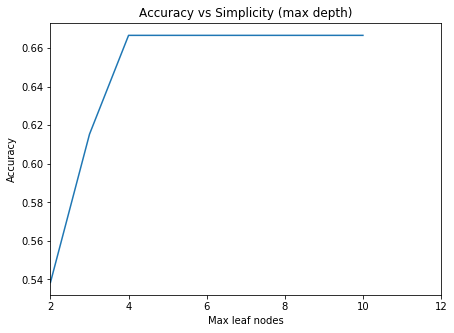

In [243]:
import matplotlib.pylab as plt
# your code here
%matplotlib inline
plt.figure(figsize=(7,5))
plt.plot(range(2,11),Test_OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max depth)")
plt.xlim(2,12)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [244]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,cv=5)
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(rs.score(X_train,y_train))
print("Out sample: {}".format(rs.score(X_test,y_test)))
# your code here

{'max_depth': 3}
0.813186813187
Out sample: 0.615384615385


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [1]:
from sklearn import tree

# your code here
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

NameError: name 'DecisionTreeClassifier' is not defined

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(1,51,5)}
rf=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gr=GridSearchCV(rf,param_grid=param_grid,cv=5)
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(rs.score(X_train,y_train))
print("Out sample: {}".format(rs.score(X_test,y_test)))

{'n_estimators': 41}
0.967032967033
Out sample: 0.692307692308


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.

Decision tree model predicts using if then this conditions. One of the main advantages of decision trees is its interpretability.It is possible to make straightforward viszualizatons that represent how a tree takes a decision when given an input. But decision trees are prone to overfitting espectially when the depth of the tree is large. Random Forest aggregate the results of several decision trees. This makes their accuracy higher but at the cost of interpretability.The Random Forest gives slightly higher out of sample accuracy bu this comes at the cost of interpretability. For both the models it can be seen that there is overfitting. The Random Forest does not give a significant improvement in performance from decision trees.